### MIS 6381 - Introduction to Data Science

#### Homework Assignment 2  - Group 30 
#### Date : 28th July 2021
Group Members:
<ul>
<li>Ally McNulty</li>
<li>Safiuddin Mohammed</li>
<li>Trevor Moos</li>
</ul>


### SETUP


In [40]:
import pandas as pd

df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

### Q1 : Create a unique name for each restaurant 
 

In [41]:

df['RESTAURANT'] = df['DBA'].str.cat(df[['BUILDING','STREET','ZIPCODE','BORO']].values,sep=' ')
print(df['RESTAURANT'][:10])

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


### Q2 : How many restaurants are included in the data?

<b>Approach: </b> <br>
Column <i>'restaurant'</i> allows us to uniquely identify a restaurant from the data set. Counting the number of unique values allows of <i>'restaurant'</i> gives us the total number of restaurants in the data set

In [42]:
countOfRestaurants=df['RESTAURANT'].nunique()
print('Number of restaurant included in the data : ',countOfRestaurants)

Number of restaurant included in the data :  10114


### Q3 : How many chains are there?

<b>Approach: </b> <br>
<ul>
    <li>Create a reduced dataframe with only <i> 'DBA' </i> and <i> 'RESTAURANTS' </i> columns. Drop duplicates, so avoid repetition due to repeated violation inspections. Saved in <code>uniqueRestaurauntAdresses</code></li>
    <li>Count <i> DBA </i> occurunces in number of <i> RESTAURAUNTS </i>. That is number of addresses that each DBA is in.     </li>
    <li>Chose DBA having count of adresses atleast equal to two. This indicated a <b>chain<b> </li>
</ul>

In [43]:
uniqueRestaurauntAdresses=df[['DBA','RESTAURANT']].drop_duplicates(subset=['RESTAURANT'], keep='first')

#Chains is when there are more than one unique adress for a single DBA
countOfLocations=uniqueRestaurauntAdresses['DBA'].value_counts().rename_axis('Chain Name').reset_index(name='counts')
countOfChains=countOfLocations[countOfLocations['counts']>1]



print('number of chains',len(countOfChains))
print('number of chain restauraunts',sum(countOfChains.counts))

number of chains 368
number of chain restauraunts 1666


### Q4 : Plot a bar graph of the top 20 most popular chains.

<b>Approach: </b> <br>
<ul>
    <li>Use <code>countOfChains</code> dataframe created previously. Values are in descending order.</li>
    <li>Use list slicing to chose and plot first 20 indexes (already sorted).</li>
</ul>

<b> Note: </b> We ignore further indexes even though there are chains with equal number of restaurant in the 20th position, as the question specifically asks for top 20. For Example - Pronto Pizza, Hale & Hearty Soups, and Checkers all have 10 restauraunts, but we consider only Pronto Pizza in the 20th position.

,counts
Chain Name,
SUBWAY,144
MCDONALD'S,79
STARBUCKS COFFEE,74
DUNKIN' DONUTS,69
DUNKIN DONUTS,64
KENNEDY FRIED CHICKEN,44
BURGER KING,36
CROWN FRIED CHICKEN,32
"DUNKIN' DONUTS, BASKIN ROBBINS",20


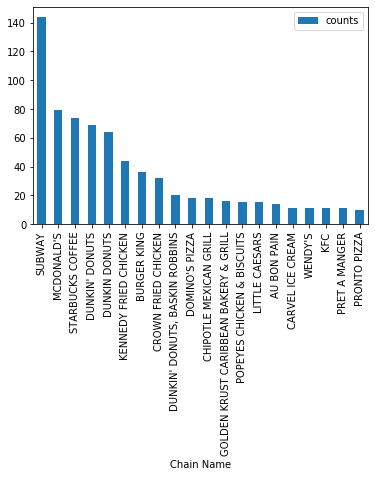

In [44]:
countOfChains=countOfLocations[countOfLocations['counts']>1]
countOfChains=countOfChains.set_index('Chain Name')
display(countOfChains[0:20])
countOfChains[0:20].plot.bar();

### Q5: What fraction of all restaurants are chain restaurants?
<b>Approach: </b> <br>
<ul>
    <li><code>countOfChains</code> dataframe consists of Chain Name : Number of restaurants for that Chain(counts). Sum of the counts column gives us the total number of chain restaurants.</li>
    <li><code>uniqueRestaurauntAdresses</code> dataframe created in Q3, gives us a dataframe of unique restaurants. Length of this dataframe indicates the total number of restauraunts.</li>
</ul>


In [45]:
fractionOfChains=(sum(countOfChains.counts))/len(uniqueRestaurauntAdresses)
print(fractionOfChains)

0.16472216729286138


### Q6: Plot the number of non-chain restaurants in each Boro.
<b>Approach: </b> <br>
<ul>
    <li> To identify 'non-chain' restauraunts, Add Column to original dataframe df, which indicates a <i>chain</i> or <i>nonchain<i> restaurant. <blockquote><ul><li>Left merge dataframe <code>df</code> with <code>countOfChains</code> on <code>DBA</code> column. </li> <li>Replace <code>Nan</code> values with '0'. If column value =0 it is an independent restauraunt or a 'nonchain'</li></ul></blockquote></li>
    <li><code>uniqueIndependentRestauraunts</code> Filter df to get only non-chain restauraunts with newly created column. Remove duplicates to ensure only unique restauraunts</li>
        <li><code>countOfNonchainsInEachBoro</code> Count the number of restaurants (rows) for each <code>BORO</code> </li>
</ul>

        
<b>Please Note: We remove all BORO values with <i> " Missing "</i> value</b>

,counts
BORO,
MANHATTAN,3323
BROOKLYN,2180
QUEENS,1968
BRONX,659
STATEN ISLAND,312


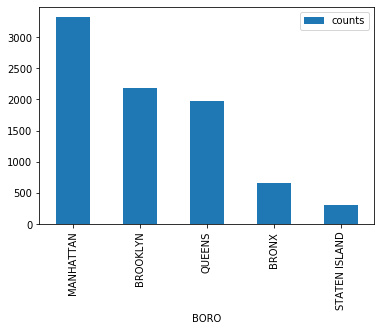

In [46]:
#Add Column 'counts' to the original df
countOfChains=countOfChains.rename_axis('DBA').reset_index('DBA')
df=df.merge(countOfChains, on='DBA' , how='left')
df['counts'] = df['counts'].fillna(0)
df.loc[df.counts > 0, 'counts'] = 'chain'
df.loc[df.counts == 0, 'counts'] = 'nonchain'

uniqueRestauraunts=df[['DBA','RESTAURANT','BORO','counts']].drop_duplicates(subset=['RESTAURANT'], keep='first')
uniqueIndependentRestauraunts=uniqueRestauraunts[uniqueRestauraunts['counts']=='nonchain']

countOfNonchainsInEachBoro=uniqueIndependentRestauraunts['BORO'].value_counts().rename_axis('BORO').reset_index(name='counts')
countOfNonchainsInEachBoro=countOfNonchainsInEachBoro[countOfNonchainsInEachBoro['BORO']!='Missing']
countOfNonchainsInEachBoro=countOfNonchainsInEachBoro.set_index('BORO')

display(countOfNonchainsInEachBoro)

countOfNonchainsInEachBoro.plot.bar();

### Q7: Plot the fraction of non-chain restaurants in each boro. 

<b>Approach: </b> <br>
<ul>
    <li><code>countOfAllInEachBoro</code> Get number of restaurants in each BORO of both chain and nonchain types</li>
    <li><code>countOfNonchainsInEachBoro</code> Calculated previously.</li>
    <li><code>countByBoro</code> Merge the above two calculated dataframes <code>countOfAllInEachBoro</code> and <code>countOfNonchainsInEachBoro</code>.
    <li><code>fracNonchain</code> Create new column dividing <code>countOfNonchainsInEachBoro</code> with <code>countOfAllInEachBoro</code></li>
</ul>


<b>Answer: </b> <br>
Most Independednt Restauraunts in Manhattan BORO. However, highest  of fraction Independednt Restauraunt in Brooklyn BORO. 

,BORO,counts_total,counts_nonchain,fracNonchain
0,MANHATTAN,4001,3323,0.830542
1,BROOKLYN,2529,2180,0.862001
2,QUEENS,2321,1968,0.847910
3,BRONX,855,659,0.770760
4,STATEN ISLAND,394,312,0.791878


Most Independednt Restauraunts in Manhattan BORO. However, highest ration of  Independednt Restauraunt in Brooklyn


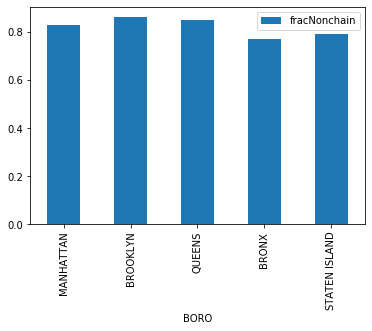

In [47]:
countOfAllInEachBoro=uniqueRestauraunts['BORO'].value_counts().rename_axis('BORO').reset_index(name='counts')
countOfAllInEachBoro=countOfAllInEachBoro[countOfAllInEachBoro['BORO']!='Missing']

countByBoro=countOfAllInEachBoro.merge(countOfNonchainsInEachBoro, on='BORO', how='left', suffixes=['_total','_nonchain'])
countByBoro['fracNonchain']=countByBoro['counts_nonchain']/countByBoro['counts_total']


display(countByBoro)

print('Most Independednt Restauraunts in Manhattan BORO. However, highest ration of  Independednt Restauraunt in Brooklyn')

countByBoro.plot.bar(x='BORO', y='fracNonchain')

### Q8: Plot the popularity of cuisines (Top 20). 

<b>Approach: </b> <br>
<ul>
    <li><code>uniqueRestauraunts</code> Get list of unique restauraunts by dropping dupicates based on the <i>RESTAURANT</i> column in df.</li>
    <li><code>countOfRestaurauntsPerCuisine</code> Frequency count of <i>CUISINE DESCRIPTION</i> in the <code>uniqueRestauraunts</code> dataframe. The dataframe is sorted by frequency</li>
    <li><code>countOfRestaurauntsPerCuisine</code> Slice the top 20 values, and plot in a bar graph.

</ul>


<b> Note: </b> We ignore further indexes even though there are cuisines with equal number of restaurant in the 20th position, as the question specifically asks for top 20.

,counts
CUISINE DESCRIPTION,
American,2238
Chinese,1098
Café/Coffee/Tea,498
Pizza,482
Italian,451
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",391
Japanese,340
Mexican,339
Bakery,326


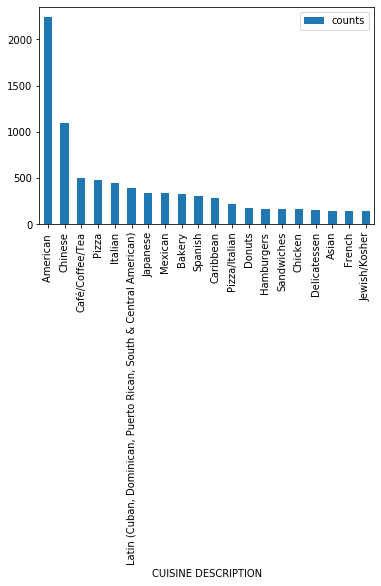

In [48]:
uniqueRestauraunts=df[['DBA','RESTAURANT','CUISINE DESCRIPTION','counts']].drop_duplicates(subset=['RESTAURANT'], keep='first')
countOfRestaurauntsPerCuisine=uniqueRestauraunts['CUISINE DESCRIPTION'].value_counts().rename_axis('CUISINE DESCRIPTION').reset_index(name='counts')
countOfRestaurauntsPerCuisine=countOfRestaurauntsPerCuisine.set_index('CUISINE DESCRIPTION')

display(countOfRestaurauntsPerCuisine[0:20])
countOfRestaurauntsPerCuisine[0:20].plot.bar();

### Q9: Plot the cuisines among restaurants which never got cited for violations(Top 20).

<b>Approach: </b> <br>
<ul>
    <li><code>noViolation</code> Get dataframe of restauraunts with atleast one inspection not having any violation.</li>
    <li><code>hasViolation</code> Get dataframe of restauraunts with atleast one inspection having a violation.y</li>
    <li><code>noViolationReduced</code> Filter restauraunts from <code>noViolation</code> that exist in <code>hasViolation</code>. These are restaurants that may have cleared a few inspections with no violation but have previously received. We want restauraunts that <b> never </b> got cited for violations. </li>
    <li><code>noViolationReducedRemoveDuplicates</code> Remove duplicate records. These are restauraunts that had multiple inspections with no violations cited. </li>
    <li><code>countCuisinesNoViolationRestauraunts</code> Finally count the cuisines from the <code>noViolationReducedRemoveDuplicates</code> dataframe. Slice and plot top-20 indexes after sorting. </li>
</ul>


<b> Note: </b> We ignore further indexes even though there are cuisines with equal number of restaurant in the 20th position, as the question specifically asks for top 20.

,counts
CUISINE DESCRIPTION,
American,49
Chinese,42
Café/Coffee/Tea,14
Pizza,11
Italian,10
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",10
Spanish,8
Japanese,8
Bakery,7


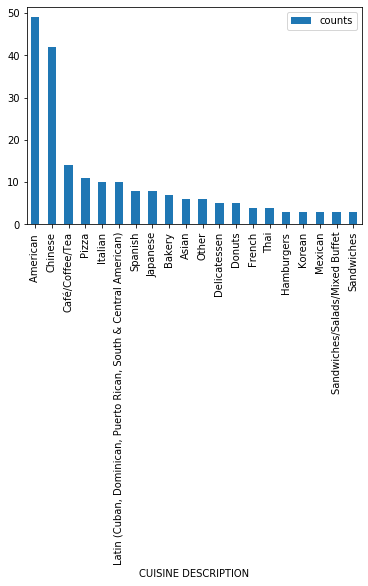

In [49]:
noViolation=df[df['VIOLATION CODE'].isnull()]
hasViolation=df[~df['VIOLATION CODE'].isnull()]


noViolationReduced=noViolation[~noViolation['RESTAURANT'].isin(hasViolation['RESTAURANT'])]
noViolationRestauraunts=noViolation[['DBA','RESTAURANT','CUISINE DESCRIPTION','VIOLATION CODE']].drop_duplicates(subset=['RESTAURANT'], keep='first')


noViolationReducedRemoveDuplicates=noViolationReduced.drop_duplicates(subset=['RESTAURANT'], keep='first')
countCuisinesNoViolationRestauraunts=noViolationReducedRemoveDuplicates['CUISINE DESCRIPTION'].value_counts().rename_axis('CUISINE DESCRIPTION').reset_index(name='counts')
countCuisinesNoViolationRestauraunts=countCuisinesNoViolationRestauraunts.set_index('CUISINE DESCRIPTION')
display(countCuisinesNoViolationRestauraunts[0:20])
countCuisinesNoViolationRestauraunts[0:20].plot.bar();

### Q10: What cuisines tend to be the “cleanest” (Top 10). Only find and display. 

<b>Approach: </b> <br>
<ul>
    <li><code>countOfRestaurauntsPerCuisine</code> Use dataframe calculated previously in Q8 </li>
    <li><code>countOfgreater20RestaurauntsPerCuisine</code> Filter cuisines with at least 20 restauraunts</li>
    <li><code>cleanestRestaurantsRatios</code> dataframe created from merging <code>countCuisinesNoViolationRestauraunts</code>. <code>countCuisinesNoViolationRestauraunts</code> dataframw was calculated previously in Q9. 
    <li><code>cleanestRestaurantsRatios['cleanliness factor']</code> is <code>countOfgreater20RestaurauntsPerCuisine</code> divided by <code>countCuisinesNoViolationRestauraunts</code></li>
    <li><code>topTencleanestRestauraunts</code> is <code>cleanestRestaurantsRatios</code> sorted and displayed in descending order for head(10) .  </li>
</ul>


In [50]:
countOfRestaurauntsPerCuisine=countOfRestaurauntsPerCuisine.reset_index()
countOfgreater20RestaurauntsPerCuisine=countOfRestaurauntsPerCuisine[countOfRestaurauntsPerCuisine['counts']>=20]
cleanestRestaurantsRatios=countOfgreater20RestaurauntsPerCuisine.merge(countCuisinesNoViolationRestauraunts , on='CUISINE DESCRIPTION', how='left', suffixes=['_total','_noviolations'])
cleanestRestaurantsRatios['cleanliness factor']=cleanestRestaurantsRatios['counts_noviolations']/cleanestRestaurantsRatios['counts_total']
topTencleanestRestauraunts = cleanestRestaurantsRatios.sort_values('cleanliness factor',ascending = False).head(10)
print('TOP 10 Cleanliest cuisines')
display(topTencleanestRestauraunts[['CUISINE DESCRIPTION','cleanliness factor']])

TOP 10 Cleanliest cuisines


,CUISINE DESCRIPTION,cleanliness factor
44,Soul Food,0.090909
39,Vietnamese/Cambodian/Malaysia,0.062500
24,Other,0.058252
47,Continental,0.047619
46,Barbecue,0.047619
45,Soups & Sandwiches,0.047619
17,Asian,0.041096
1,Chinese,0.038251
32,Greek,0.036364
41,Peruvian,0.035714


### Q11: What are the most common violations in each borough? 
<b>Approach: </b> <br>
<ul>
    <li><code>boroViolations</code> Crosstab function of Pandas to get count of each violation in BORO.</li>
    <li><code>mostCommonViolationCode</code> Use idxmax() to get highest value for each BORO</li>
    <li><code>mostCommonViolationCode</code> Merge with <code>violationDictionary</code> to get Violation description and Violation Code</li>
</ul>

<b>Note: We do not consider records with Missing BORO value</b>

In [51]:
df_wo_m=df[df.BORO != "Missing"]

boroViolations=pd.crosstab( df_wo_m['BORO'], df_wo_m['VIOLATION DESCRIPTION'] )
mostCommonViolationCode=boroViolations.idxmax(axis=1).rename_axis('CUISINE DESCRIPTION').reset_index(name='VIOLATION DESCRIPTION')
violationDictionary=df[['VIOLATION CODE','VIOLATION DESCRIPTION']].drop_duplicates()
mostCommonViolationCode=mostCommonViolationCode.merge(violationDictionary , on='VIOLATION DESCRIPTION' , how='left' )

display(mostCommonViolationCode)

,CUISINE DESCRIPTION,VIOLATION DESCRIPTION,VIOLATION CODE
0,BRONX,Non-food contact surface improperly constructe...,10F
1,BROOKLYN,Non-food contact surface improperly constructe...,10F
2,MANHATTAN,Non-food contact surface improperly constructe...,10F
3,QUEENS,Non-food contact surface improperly constructe...,10F
4,STATEN ISLAND,Non-food contact surface improperly constructe...,10F


### Q12: What are the most common violations per borough,after normalizing for the relative abundance of each violation? 


<hr>
<b>We have submitted two solutions for this problem <ul><li>Solution 1 : Following logic specified in question</li><li>Solution 2 : Using the inbuilt normalization parameter in crosstab function.</li></ul></b>

<hr>
<b>Approach 1: Logic in specified question</b> <br>
<ul>
    <li><code>violationFrequency</code>Total frequency of violations across compplete origin dataframe df</li>
    <li><code>boroViolations</code> Use dataframe calculated in Q11. Indicating frequency of each type of violation in each BORO.</li>
    <li><code>boroViolations</code> values divided with respective total frequencies given by <code>violationFrequency</code>. This normalizes the matrix</li>
    <li><code>mostCommonViolationCode</code> display the maximum Viloation Code and Violation Description for maximum value after normalization</li>
</ul>

<b>Approach 2: Inbuilt parameter</b> <br>
<ul>
    <li><code>normalize="index"</code> Pass this parameter in the crossrav function. </li>
    <li><code>mostCommonViolationCode</code> display the maximum Viloation Code and Violation Description for maximum value after normalization</li>
</ul>
<b>Note: We do not consider records with Missing BORO value</b>

In [52]:
#Solution 1
violationFrequency=df_wo_m['VIOLATION DESCRIPTION'].value_counts().rename_axis('VIOLATION DESCRIPTION').reset_index(name='total')

for violation_description in violationFrequency['VIOLATION DESCRIPTION']:
    totalviolations=violationFrequency[violationFrequency['VIOLATION DESCRIPTION']==violation_description]['total']
    boroViolations[violation_description]=boroViolations[violation_description]/totalviolations.item()


mostCommonViolationCode=boroViolations.idxmax(axis=1).rename_axis('CUISINE DESCRIPTION').reset_index(name='VIOLATION DESCRIPTION')
violationDictionary=df[['VIOLATION CODE','VIOLATION DESCRIPTION']].drop_duplicates()
mostCommonViolationCode=mostCommonViolationCode.merge(violationDictionary , on='VIOLATION DESCRIPTION' , how='left' )
print('---'*35)
print('Solution 1 : Output')
display(mostCommonViolationCode)


clean_df_duplicates=df[df.BORO != "Missing"]
mostCommonViolationCode=pd.crosstab(index = clean_df_duplicates["VIOLATION DESCRIPTION"],columns=clean_df_duplicates["BORO"],
margins = True,normalize="index").idxmax()
print('---'*35)
print('Solution 2 : Output')
display(mostCommonViolationCode.reset_index())


#Solution 2

---------------------------------------------------------------------------------------------------------
Solution 1 : Output


,CUISINE DESCRIPTION,VIOLATION DESCRIPTION,VIOLATION CODE
0,BRONX,Unprotected food re-served.,04I
1,BROOKLYN,Precooked potentially hazardous food from comm...,02D
2,MANHATTAN,Out-of package sale of tobacco products observed.,15E
3,QUEENS,Caloric content range (minimum to maximum) not...,16E
4,STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po...",03C


---------------------------------------------------------------------------------------------------------
Solution 2 : Output


,BORO,0
0,BRONX,Unprotected food re-served.
1,BROOKLYN,Precooked potentially hazardous food from comm...
2,MANHATTAN,Out-of package sale of tobacco products observed.
3,QUEENS,Caloric content range (minimum to maximum) not...
4,STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po..."


### Q13: How many phone area codes correspond to a singlezipcode?

<b>Approach: </b> <br>
<ul>
    <li><code>zippcode_phone_df</code> Dataframe with only two columns, zipcode and phone</li>
    <li><code>zippcode_phone_df['AREA_CODE']</code> Add areacode column as removing the first 3 digits of the phone number</li>
    <li><code>areacode_zipcode_counts</code> Is created as a result of grouping the <code>zippcode_phone_df</code> with area code and counting the number of zipcodes against it</li>
    <li><code>areacode_unique_zipcode</code> area_codes with only one count of zip codes against them are filtered from <code>areacode_zipcode_counts</code> </li>
</ul>


In [53]:
zippcode_phone_df=df[['ZIPCODE','PHONE']].copy()  
zippcode_phone_df=zippcode_phone_df.drop_duplicates()
zippcode_phone_df['AREA_CODE']=zippcode_phone_df['PHONE'].astype(str).str[0:3]
areacode_zipcode_counts=zippcode_phone_df.groupby('AREA_CODE').count().reset_index()
areacode_unique_zipcode=areacode_zipcode_counts[areacode_zipcode_counts['ZIPCODE']==1]

#display(areacode_unique_zipcode)
print('Number of AREA CODES associated with just 1 ZIPCODE is : ' ,len(areacode_unique_zipcode))

Number of AREA CODES associated with just 1 ZIPCODE is :  34


### Q14: Find the most commonly street type that occurs with each of the following:    AVE, ST, RD, PL , BOULEARD and BULEVARD.

<b>Approach: </b> <br>
<ul>
    <li><code>df_duplicates</code> Dataframe with unique restauraunts</li>
    <li><code>df_base_zip_combined</code> Dataframe consisting of the following columns : <ul><li>STREET TYPE - Last word from STREET column in origin dataframe df</li><li>STREET BASE - All but the last word from STREET column in origin dataframe df</li><li>STREET BASE AND ZIP - Concatenation of STREET BASE and ZIPCODE columns from <code>df_base_zip_combined</code> and <code>df_duplicates</code> dataframes respectively </li></ul></li>
    <li><code>df_base_zip_combined_merged</code> is self merged. To get the mapping  between the STREET TYPE variables </li>
    <li><code>df_base_zip_combined_merged_uniques</code> remove when STREET TYPE is mapped to the same STREET TYPE after the self join</li>
    <li><code>cross_table</code> Do a crosstable function and display values for streetnames specified in question.</li>
</ul>

In [54]:
df_duplicates=df.drop_duplicates(subset = "RESTAURANT")
df_base_zip_combined=pd.DataFrame()

street_type=df_duplicates["STREET"].str.split().str[-1]
street_base=df_duplicates["STREET"].str.split(" ",1).str[0]


df_base_zip_combined["STREET TYPE"]=street_type
df_base_zip_combined["STREET BASE"]=street_base
df_base_zip_combined["STREET BASE AND ZIP"]=df_base_zip_combined["STREET BASE"]+ [" "] +df_duplicates["ZIPCODE"]

df_base_zip_combined=df_base_zip_combined.drop_duplicates()
df_base_zip_combined=df_base_zip_combined[df_base_zip_combined['STREET BASE'] != '']

df_base_zip_combined_merged=df_base_zip_combined.merge(df_base_zip_combined, on='STREET BASE AND ZIP')
df_base_zip_combined_merged_uniques=df_base_zip_combined_merged['STREET TYPE_x']!=df_base_zip_combined_merged['STREET TYPE_y']
final_table=df_base_zip_combined_merged[df_base_zip_combined_merged_uniques]
cross_table=pd.crosstab(index=final_table["STREET TYPE_x"],
            columns=final_table["STREET TYPE_y"])
display(cross_table.idxmax()[["AVE", "ST", "RD", "PL", "BOULEARD", "BULEVARD"]])

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object

### END OF ASSIGNMENT